In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x = mnist.data
y = mnist.target

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### mnist 数据集 已经做好了测试集与训练集的分隔 前60000条为训练集， 后10000条为测试集

In [6]:
train_x = x[:60000, :]
train_x.shape

(60000, 784)

In [7]:
test_x = x[60000:, :]
test_x.shape

(10000, 784)

In [8]:
train_y = y[:60000]
test_y = y[60000:]

In [9]:
train_y.shape

(60000,)

In [10]:
test_y.shape

(10000,)

In [11]:
train_y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

### mnist数据展示

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize = (10,10), subplot_kw = {'xticks':[], 'yticks':[]}, 
                           gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28), cmap = 'binary', interpolation = 'nearest', clim=(0,16))

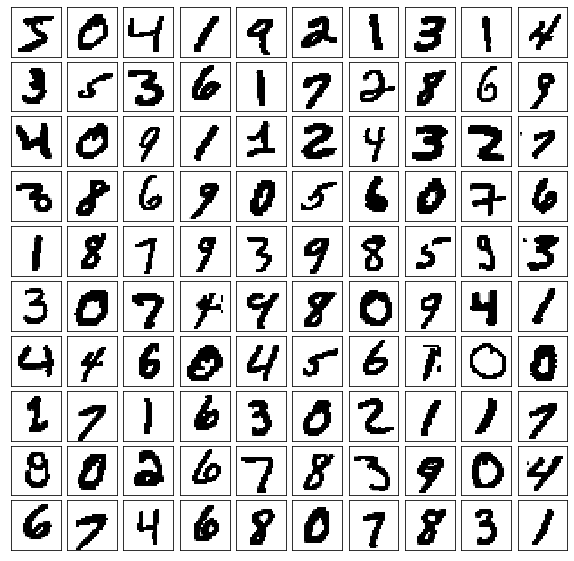

In [13]:
example_x = train_x[:100, :]
plot_digits(example_x)

### sklearn 中的ANN -- mlp

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
mlp_clf = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (200, 100, 60, 30, 10), random_state = 666)

In [16]:
mlp_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 100, 60, 30, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=666,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [17]:
mlp_score = mlp_clf.score(test_x, test_y)
mlp_score

0.9783

In [18]:
predict_y = mlp_clf.predict(test_x)

In [19]:
from sklearn.metrics import recall_score, f1_score, precision_score, confusion_matrix, classification_report

In [20]:
mlp_recall = recall_score(test_y, predict_y, average='micro')
mlp_recall

0.9783

In [21]:
mlp_precision = precision_score(test_y, predict_y, average='micro')
mlp_precision

0.9783

In [22]:
mlp_cm = confusion_matrix(test_y, predict_y)
mlp_cm

array([[ 964,    1,    3,    1,    1,    0,    3,    2,    2,    3],
       [   0, 1126,    0,    1,    0,    0,    1,    1,    6,    0],
       [   3,    3, 1005,    2,    0,    0,    1,    3,   15,    0],
       [   0,    0,    3,  986,    0,    2,    0,    3,   12,    4],
       [   2,    0,    4,    0,  952,    0,    3,    2,    1,   18],
       [   1,    2,    1,   12,    1,  864,    5,    0,    4,    2],
       [   2,    2,    0,    0,    3,    3,  943,    0,    5,    0],
       [   0,    5,    3,    2,    1,    0,    0,  999,    3,   15],
       [   1,    0,    4,    4,    0,    2,    3,    3,  952,    5],
       [   0,    2,    0,    2,    4,    5,    0,    0,    4,  992]],
      dtype=int64)

In [23]:
clf_report = classification_report(test_y, predict_y, labels=[0,1,2,3,4,5,6,7,8,9])
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.95      0.98      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



e:\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


### Keras 中的ANN

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier 

Using TensorFlow backend.


In [29]:
def build_classifier():
    clf = Sequential()   #  初始化神经网络
    clf.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu', input_dim =train_x.shape[1]))
    clf.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))
    clf.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
    return clf

In [26]:
clf = KerasClassifier(build_fn = build_classifier, epochs = 50)
accuracies = cross_val_score(estimator = clf, X = x, y = y, cv = 5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
56000/56000 [==============================] - 8s 137us/step - loss: 0.2554 - accuracy: 0.9211
Epoch 2/50
56000/56000 [==============================] - 7s 128us/step - loss: 0.1196 - accuracy: 0.9663
Epoch 3/50
56000/56000 [==============================] - 7s 133us/step - loss: 0.0874 - accuracy: 0.9741
Epoch 4/50
56000/56000 [==============================] - 7s 128us/step - loss: 0.0756 - accuracy: 0.9785
Epoch 5/50
56000/56000 [==============================] - 7s 133us/step - loss: 0.0615 - accuracy: 0.9822
Epoch 6/50
56000/56000 [==============================] - 7s 130us/step - loss: 0.0607 - accuracy: 0.9836
Epoch 7/50
56000/56000 [==============================] - 7s 132us/step - loss: 0.0539 - accuracy: 0.9858
Epoch 8/50
56000/56000 [==============================] - 7s 128us/step - loss: 0.0488 - accuracy: 0.9877
Epoch 9/50
56000/56000 [==============================] -

In [27]:
accuracies    #### 训练出现大量loss: nan 导致结果不收敛 1. 梯度爆炸，解决方法：调学习率、梯度剪裁、归一化
              ###                                    2. 计算loss的时候有log0，可能是初始化的问题，也可能是数据的问题

array([0.10035715, 0.09607143, 0.0995    , 0.09907143, 0.09807143])

In [30]:
clf = KerasClassifier(build_fn = build_classifier, epochs = 20)
accuracies = cross_val_score(estimator = clf, X = x, y = y, cv = 3)

Epoch 1/20
46666/46666 [==============================] - 8s 177us/step - loss: 0.2663 - accuracy: 0.9185
Epoch 2/20
46666/46666 [==============================] - 8s 168us/step - loss: 0.1245 - accuracy: 0.9633
Epoch 3/20
46666/46666 [==============================] - 8s 164us/step - loss: 0.0962 - accuracy: 0.9731
Epoch 4/20
46666/46666 [==============================] - 8s 175us/step - loss: 0.0809 - accuracy: 0.9780
Epoch 5/20
46666/46666 [==============================] - 8s 163us/step - loss: 0.0701 - accuracy: 0.9807
Epoch 6/20
46666/46666 [==============================] - 8s 177us/step - loss: 0.0583 - accuracy: 0.9832
Epoch 7/20
46666/46666 [==============================] - 9s 192us/step - loss: 0.0525 - accuracy: 0.9854
Epoch 8/20
46666/46666 [==============================] - 9s 190us/step - loss: 0.0476 - accuracy: 0.9869
Epoch 9/20
46666/46666 [==============================] - 9s 183us/step - loss: 0.0478 - accuracy: 0.9875
Epoch 10/20
46666/46666 [=====================

In [31]:
accuracies

array([0.97741491, 0.97548538, 0.97758538])

In [32]:
accuracies.mean()

0.9768285552660624

In [33]:
accuracies.std()

0.0009523115023649224

In [38]:
clf.fit(train_x, train_y)

predict_y = clf.predict(test_x)

Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.2428 - accuracy: 0.9269
Epoch 2/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.1163 - accuracy: 0.9666
Epoch 3/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0930 - accuracy: 0.9730
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0767 - accuracy: 0.9784
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0641 - accuracy: 0.9819
Epoch 6/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0580 - accuracy: 0.9835
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0534 - accuracy: 0.9855
Epoch 8/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0495 - accuracy: 0.9866
Epoch 9/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0469 - accuracy: 0.9871
Epoch 10/20
60000/60000 [============

In [39]:
clf_cm = confusion_matrix(test_y, predict_y)
clf_cm

array([[ 972,    1,    1,    0,    0,    1,    2,    1,    2,    0],
       [   1, 1122,    2,    3,    0,    1,    1,    2,    3,    0],
       [   2,    0, 1001,    8,    3,    2,    0,    6,    9,    1],
       [   0,    0,    5,  992,    0,    1,    0,    4,    6,    2],
       [   0,    3,    3,    0,  962,    0,    4,    2,    0,    8],
       [   1,    2,    0,   11,    2,  859,   10,    0,    4,    3],
       [   3,    2,    0,    0,    4,    5,  942,    0,    2,    0],
       [   0,    3,    5,    1,    1,    0,    0, 1009,    4,    5],
       [   0,    1,    2,    6,    4,    3,    0,    4,  951,    3],
       [   2,    3,    0,    5,   10,    0,    0,   15,    4,  970]],
      dtype=int64)

In [40]:
report = classification_report(test_y, predict_y, labels=[0,1,2,3,4,5,6,7,8,9])
print(clf_report)

e:\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.95      0.98      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

